In [1]:
!pip install datasets
!pip install patchify

In [2]:
!ls ./drive/MyDrive

 232020MAT1__MARTI_PEREZ_firmado.pdf			       Justificante_17572749.pdf
 26579566F_FÉLIX_MARTÍ_ciudadano_1644506302753.p12	       Orux
 Bd							       Pasta_Tour.docx
'Colab Notebooks'					      'Personal_monthly_budget .xlsx'
 Dataset						       Resume.gdoc
 Docubox_19-09-2022_1231.pdf				      'Untitled document.gdoc'
 felix-Protocolo-de-actuacion-Certificado-Entorno-Seguro.pdf


In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import torch
import glob
import json
from PIL import Image
from patchify import patchify

In [4]:
def json_to_mask(json_file, image_shape=(750, 1000)):
    mask = np.zeros(image_shape, dtype=np.uint8)
    #print(mask.shape)
    #print(json_file[0]['content'])
    pts = []
    if len(json_file[0]['content']) == 0:
        return mask
    for point in json_file[0]['content']:
        if json_file[0]['contentType'] == 'polygon':
            #print(point['x'], point['y'])
            x,y = int(point['x']), int(point['y'])
            #print(mask[y,x])
            pts.append([x,y])
    #print(mask.shape)
    pts = np.array(pts, np.int32)
    mask = cv2.fillPoly(mask, pts=[pts], color=255)
    return mask

In [5]:
image_files = sorted(glob.glob("./drive/MyDrive/Dataset/images/*.jpg"))
mask_files = sorted(glob.glob("./drive/MyDrive/Dataset/masks/*.json"))

In [6]:
images_str = [str(file) for file in image_files]
masks_str = [str(file) for file in mask_files]
print(images_str)
print(masks_str)

['./drive/MyDrive/Dataset/images/0.jpg', './drive/MyDrive/Dataset/images/1.jpg', './drive/MyDrive/Dataset/images/10.jpg', './drive/MyDrive/Dataset/images/100.jpg', './drive/MyDrive/Dataset/images/101.jpg', './drive/MyDrive/Dataset/images/102.jpg', './drive/MyDrive/Dataset/images/103.jpg', './drive/MyDrive/Dataset/images/104.jpg', './drive/MyDrive/Dataset/images/105.jpg', './drive/MyDrive/Dataset/images/106.jpg', './drive/MyDrive/Dataset/images/107.jpg', './drive/MyDrive/Dataset/images/108.jpg', './drive/MyDrive/Dataset/images/109.jpg', './drive/MyDrive/Dataset/images/11.jpg', './drive/MyDrive/Dataset/images/110.jpg', './drive/MyDrive/Dataset/images/111.jpg', './drive/MyDrive/Dataset/images/112.jpg', './drive/MyDrive/Dataset/images/113.jpg', './drive/MyDrive/Dataset/images/114.jpg', './drive/MyDrive/Dataset/images/115.jpg', './drive/MyDrive/Dataset/images/116.jpg', './drive/MyDrive/Dataset/images/117.jpg', './drive/MyDrive/Dataset/images/118.jpg', './drive/MyDrive/Dataset/images/119.jpg

In [7]:
from PIL import Image

images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in image_files]
masks = [json_to_mask(json.load(open(file))) for file in mask_files]

images = np.array(images)
masks = np.array(masks)

In [8]:
print(images.shape)
print(masks.shape)
#print(images[0].dtype)
#print(masks[0].dtype)

(930, 750, 1000, 3)
(930, 750, 1000)


13


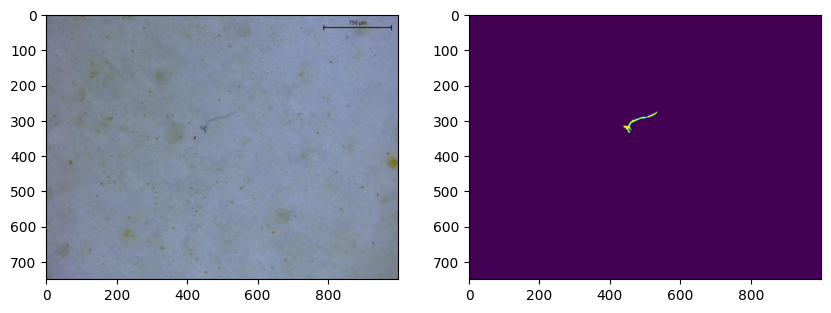

In [9]:
img_num = random.randint(0, images.shape[0]-1)
print(img_num)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(images[img_num])
axes[1].imshow(masks[img_num])

In [10]:
valid_indices = [i for i, mask in enumerate(masks) if mask.max() != 0]
filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]
print("Image shape:", filtered_images.shape)
print("Mask shape:", filtered_masks.shape)

#filtered_images = patch_images
#filtered_masks = patch_masks

Image shape: (606, 750, 1000, 3)
Mask shape: (606, 750, 1000)


In [11]:
print(valid_indices)

[0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 13, 17, 18, 22, 23, 25, 26, 27, 30, 31, 32, 35, 37, 38, 41, 43, 44, 46, 47, 49, 51, 52, 54, 55, 56, 57, 58, 65, 66, 67, 69, 70, 74, 77, 78, 79, 85, 86, 87, 88, 89, 90, 94, 96, 97, 98, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 125, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 140, 143, 144, 146, 147, 148, 150, 151, 157, 158, 159, 160, 161, 162, 163, 169, 170, 171, 174, 177, 179, 182, 183, 184, 185, 188, 189, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 208, 209, 210, 211, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228, 229, 231, 233, 234, 235, 237, 239, 241, 242, 245, 246, 249, 250, 251, 252, 253, 255, 256, 257, 263, 264, 268, 270, 272, 273, 274, 275, 277, 278, 279, 281, 282, 283, 285, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 308, 312, 314, 316, 317, 319, 320, 321, 322, 325, 327, 328, 330, 331, 334, 335, 336, 337, 339, 340, 341, 343, 344

In [12]:
dataset_dict = {
    "image": [Image.fromarray(image) for image in filtered_images],
    "mask": [Image.fromarray(mask, mode='L') for mask in filtered_masks]
}

In [13]:
from datasets import Dataset

dataset = Dataset.from_dict(dataset_dict)

In [14]:
dataset

Dataset({
    features: ['image', 'mask'],
    num_rows: 606
})

128


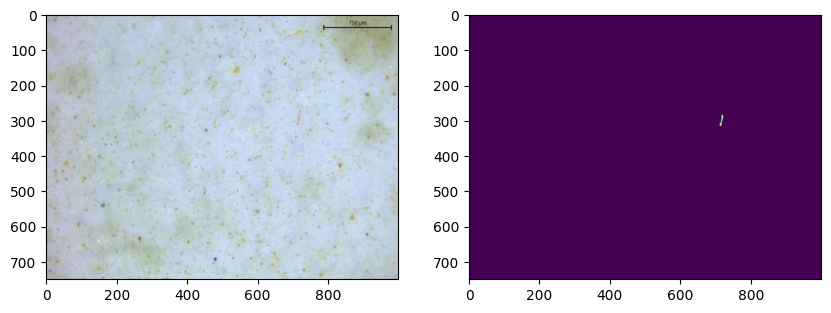

In [15]:
img_num = random.randint(0, filtered_images.shape[0]-1)
print(img_num)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(dataset[img_num]["image"])
axes[1].imshow(dataset[img_num]["mask"])

In [16]:
dataset.save_to_disk("train_929img_new")

Saving the dataset (0/1 shards):   0%|          | 0/606 [00:00<?, ? examples/s]

545


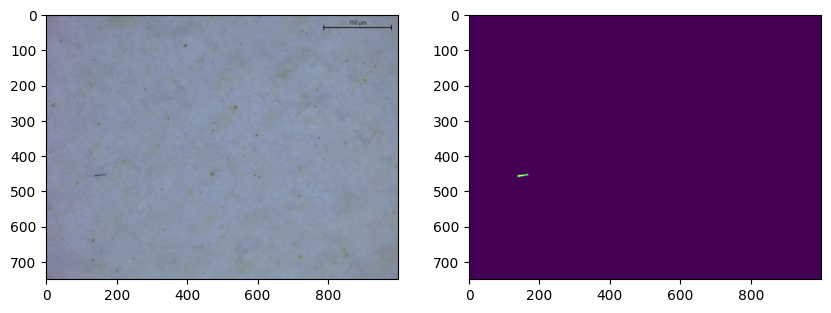

In [25]:
img_num = random.randint(0, filtered_images.shape[0]-1)
print(img_num)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(dataset[img_num]["image"])
axes[1].imshow(dataset[img_num]["mask"])